In [1]:
import quantum_UCC_ansatz as qucca
import vqe_solver

import numpy as np

from qiskit_nature.second_q.drivers import PySCFDriver

In [2]:
def calc_custom(r):
    driver = PySCFDriver(atom=f"H 0 0 0; Li 0 0 {r}", spin=0, basis="sto-3g")
    mol = driver.run()

    # initializing the circuit
    ansatz = qucca.create_circuit(mol)

    ansatz = qucca.add_reference_state(mol, ansatz)

    # generating the excitations
    excitations = qucca.generate_pCCD_excitations(mol)

    for exc in excitations:
        ansatz = qucca.add_excitation(ansatz, exc[0], exc[1])

    return vqe_solver.solve(mol, ansatz)

In [3]:
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.circuit.library import UCCSD, HartreeFock

def calc_qiskit(r):
    driver = PySCFDriver(atom=f"H 0 0 0; Li 0 0 {r}", spin=0, basis="sto-3g")
    mol = driver.run()

    mapper = JordanWignerMapper()

    ansatz = UCCSD(
    mol.num_spatial_orbitals,
    mol.num_particles,
    mapper,
    initial_state=HartreeFock(
        mol.num_spatial_orbitals,
        mol.num_particles,
        mapper))

    return vqe_solver.solve(mol, ansatz)

In [4]:
from pyscf import gto
from pyscf import dft
from pyscf import scf
from pyscf.fci import FCI


def calc_fci(r):
    mol = gto.Mole()
    mol.atom = f"H 0 0 0; Li 0 0 {r}"
    mol.basis = 'sto-3g'
    mol.spin=0
    mol.build()

    myhf = mol.RHF().run()
    cisolver = FCI(myhf)
    return cisolver.kernel()[0]

def calc_hf(r):
    mol = gto.Mole()
    mol.atom = f"H 0 0 0; Li 0 0 {r}"
    mol.basis = 'sto-3g'
    mol.spin=0
    mol.build()

    mf = scf.RHF(mol)
    return mf.kernel()

In [5]:
lin = np.linspace(0.4, 5, 50)

In [6]:
custom_curve = [calc_custom(r) for r in lin]
# 25min 50 points

/usr/local/miniconda3/lib/python3.7/site-packages/qiskit_nature/deprecation.py:297: PauliSumOpDeprecationWarning: PauliSumOp is deprecated as of version 0.6.0 and support for them will be removed no sooner than 3 months after the release. Instead, use SparsePauliOp. You can switch to SparsePauliOp immediately, by setting `qiskit_nature.settings.use_pauli_sum_op` to `False`.
  return func(*args, **kwargs)


In [7]:
hf_curve = [calc_hf(r) for r in lin]

converged SCF energy = -6.61025894411095
converged SCF energy = -7.00801797600133
converged SCF energy = -7.27166341377629
converged SCF energy = -7.45656855983761
converged SCF energy = -7.58818983707388
converged SCF energy = -7.6816759674701
converged SCF energy = -7.7474522178209
converged SCF energy = -7.7930714212914
converged SCF energy = -7.82398290234091
converged SCF energy = -7.84406585914762
converged SCF energy = -7.85607957555334
converged SCF energy = -7.86201344906152
converged SCF energy = -7.86333162402099
converged SCF energy = -7.861133540959
converged SCF energy = -7.85625781262351
converged SCF energy = -7.84935103282128
converged SCF energy = -7.84091531353672
converged SCF energy = -7.83134256976285
converged SCF energy = -7.82094015984931
converged SCF energy = -7.8099506131271
converged SCF energy = -7.79856710151052
converged SCF energy = -7.78694564807732
converged SCF energy = -7.77521465277644
converged SCF energy = -7.76348208806096
converged SCF energy =

In [8]:
fci_curve = [calc_fci(r) for r in lin]

converged SCF energy = -6.61025894411096
converged SCF energy = -7.00801797600132
converged SCF energy = -7.27166341377629
converged SCF energy = -7.45656855983761
converged SCF energy = -7.58818983707389
converged SCF energy = -7.6816759674701
converged SCF energy = -7.7474522178209
converged SCF energy = -7.79307142129141
converged SCF energy = -7.82398290234091
converged SCF energy = -7.84406585914763
converged SCF energy = -7.85607957555334
converged SCF energy = -7.86201344906151
converged SCF energy = -7.86333162402099
converged SCF energy = -7.861133540959
converged SCF energy = -7.8562578126235
converged SCF energy = -7.84935103282129
converged SCF energy = -7.84091531353672
converged SCF energy = -7.83134256976285
converged SCF energy = -7.82094015984931
converged SCF energy = -7.8099506131271
converged SCF energy = -7.79856710151053
converged SCF energy = -7.78694564807732
converged SCF energy = -7.77521465277644
converged SCF energy = -7.76348208806097
converged SCF energy =

In [9]:
# qiskit_curve = [calc_qiskit(r) for r in lin]

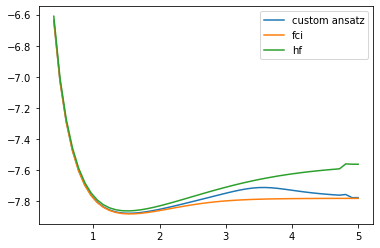

In [10]:
import matplotlib.pyplot as plt

plt.plot(lin, custom_curve, label="custom ansatz")
plt.plot(lin, fci_curve, label="fci")
plt.plot(lin, hf_curve, label="hf")


# plt.plot(lin, qiskit_curve, label="qiskit inbuilt ansatz")

plt.legend()